# Домашнее задание к лекции "Базовые понятия статистики"

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

**All columns**
- 1(0):  surgery?
- 2(1):  Age
- 3(2):  Hospital Number
- 4(3):  rectal temperature
- 5(4):  pulse
- 6(5):  respiratory rate
- 7(6):  temperature of extremities
- 8(7):  peripheral pulse
- 9(8):  mucous membranes
- 10(9): capillary refill time
- 11(10): pain - a subjective judgement of the horse's pain level
- 12(11): peristalsis
- 13(12): abdominal distension
- 14(13): nasogastric tube
- 15(14): nasogastric reflux
- 16(15): nasogastric reflux PH
- 17(16): rectal examination - feces
- 18(17): abdomen
- 19(18): packed cell volume
- 20(19): total protein
- 21(20): abdominocentesis appearance
- 22(21): abdomcentesis total protein
- 23(22): outcome
- 24(23): surgical lesion?
- 25, 26, 27: type of lesion
- 28(27): cp_data

### Задание 1. Загрузка данных

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: `surgery?`, `Age`, `rectal temperature`, `pulse`, `respiratory rate`, `temperature of extremities`, `pain`, `outcome`. 

### Description

* **1:  surgery?**
  - 1 = Yes, it had surgery
  - 2 = It was treated without surgery
  

* **2:  Age**
  - 1 = Adult horse
  - 2 = Young (< 6 months)


* **4:  rectal temperature**
  - linear
  - in degrees celsius.
  - An elevated temp may occur due to infection.
  - temperature may be reduced when the animal is in late shock
  - normal temp is 37.8
  - this parameter will usually change as the problem progresses
               eg. may start out normal, then become elevated because of
                   the lesion, passing back through the normal range as the
                   horse goes into shock
                   
                   
* **5:  pulse**
  - linear
  - the heart rate in beats per minute
  - is a reflection of the heart condition: 30 -40 is normal for adults
  - rare to have a lower than normal rate although athletic horses may have a rate of 20-25
  - animals with painful lesions or suffering from circulatory shock may have an elevated heart rate


* **6:  respiratory rate**
  - linear
  - normal rate is 8 to 10
  - usefulness is doubtful due to the great fluctuations


* **7:  temperature of extremities**
  - a subjective indication of peripheral circulation
  - possible values:
       1. = Normal
       2. = Warm
       3. = Cool
       4. = Cold
          - cool to cold extremities indicate possible shock
          - hot extremities should correlate with an elevated rectal temp.


* **11: pain - a subjective judgement of the horse's pain level**
  - possible values:
       1. = alert, no pain
       2. = depressed
       3. = intermittent mild pain
       4. = intermittent severe pain
       5. = continuous severe pain
          - should NOT be treated as a ordered or discrete variable!
          - In general, the more painful, the more likely it is to require
            surgery
          - prior treatment of pain may mask the pain level to some extent


* **23: outcome**
  - what eventually happened to the horse?
  - possible values:
       1. = lived
       2. = died
       3. = was euthanized

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*Несоответствие описанию данных в колонке Age*

Согласно описанию данных, возраст может принимать значение 1 и 2 для взрослых и молодых особей соответственно.

В исходных данных 1 и 9. Заменим 9 на 2.

In [2]:
column_names = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate',
                'temperature of extremities', 'pain', 'outcome'
]
df = pd.read_csv('horse_data.csv', usecols=[0,1,3,4,5,6,10,22], names=column_names, na_values='?')
df['Age'].replace(9, 2, inplace=True)
df.head(10)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
7,1.0,1,NaN,60.0,NaN,3.0,NaN,2.0
8,2.0,1,NaN,80.0,36.0,3.0,4.0,3.0
9,2.0,2,38.3,90.0,NaN,1.0,5.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


### Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

Выберем только непрерывные переменные для подсчета основных статистики для метрик. Так-же найдём выбросы в этих метриках

In [4]:
df_stat_before = df[['rectal temperature', 'pulse', 'respiratory rate']].describe()
df_stat_before

,rectal temperature,pulse,respiratory rate
count,240.000000,276.000000,242.000000
mean,38.167917,71.913043,30.417355
std,0.732289,28.630557,17.642231
min,35.400000,30.000000,8.000000
25%,37.800000,48.000000,18.500000
50%,38.200000,64.000000,24.500000
75%,38.500000,88.000000,36.000000
max,40.800000,184.000000,96.000000


Моды для категориальных переменных

In [5]:
df_mode_before = df[['surgery?', 'Age', 'temperature of extremities', 'pain', 'outcome']].mode()
df_mode_before

,surgery?,Age,temperature of extremities,pain,outcome
0,1.0,1,3.0,3.0,1.0


In [6]:
outliers = {}
for column, info in df_stat_before.items():
    iqr = info['75%'] - info['25%']
    lower_whisker = info['25%'] - iqr * 1.5
    upper_whisker = info['75%'] + iqr * 1.5
    outliers[column] = df[(df[column] > upper_whisker) | (df[column] < lower_whisker)]
outliers['rectal temperature']

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
20,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
44,1.0,1,35.4,140.0,24.0,3.0,4.0,3.0
54,2.0,1,40.3,114.0,36.0,3.0,2.0,3.0
75,1.0,2,39.7,100.0,NaN,3.0,2.0,3.0
80,1.0,1,36.4,98.0,35.0,3.0,4.0,2.0
91,2.0,1,40.3,114.0,36.0,3.0,2.0,2.0
99,2.0,1,39.6,108.0,51.0,3.0,2.0,1.0
118,1.0,1,36.5,78.0,30.0,1.0,5.0,1.0
141,2.0,1,36.0,42.0,30.0,NaN,NaN,2.0
238,2.0,1,36.1,88.0,NaN,3.0,3.0,3.0


In [7]:
outliers['pulse']

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,2,38.6,160.0,20.0,3.0,3.0,2.0
255,1.0,2,38.8,184.0,84.0,1.0,4.0,2.0
275,1.0,2,38.8,150.0,50.0,1.0,5.0,2.0


<AxesSubplot:xlabel='Age', ylabel='pulse'>

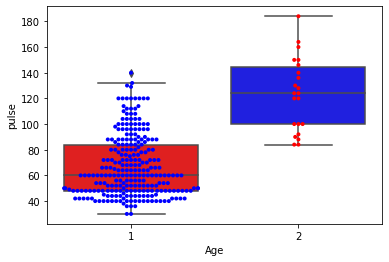

In [8]:
# sns.set_theme(style = 'white')
sns.swarmplot(data=df, x='Age', y='pulse', size=4, palette=['blue', 'red'])
sns.boxplot(data=df, x='Age', y='pulse',palette=['red', 'blue'])

У молодых особей пульс в среднем выше, чем у взрослых

In [9]:
outliers['respiratory rate']

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,2,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,2,39.0,150.0,72.0,NaN,NaN,1.0
82,1.0,2,38.1,100.0,80.0,3.0,3.0,1.0
84,1.0,1,37.8,60.0,80.0,1.0,2.0,1.0
103,1.0,2,38.0,140.0,68.0,1.0,3.0,1.0
106,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
120,1.0,1,39.4,54.0,66.0,1.0,2.0,1.0
125,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
186,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [10]:
df.corr()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
surgery?,1.000000,-0.089319,0.040680,-0.186886,-0.201423,-0.116474,-0.316086,-0.117619
Age,-0.089319,1.000000,0.196844,0.529838,0.412276,-0.056735,0.034858,-0.004083
rectal temperature,0.040680,0.196844,1.000000,0.219260,0.269181,0.096526,-0.088079,-0.057082
pulse,-0.186886,0.529838,0.219260,1.000000,0.470397,0.335041,0.307522,0.313215
respiratory rate,-0.201423,0.412276,0.269181,0.470397,1.000000,0.105934,0.128644,0.063039
temperature of extremities,-0.116474,-0.056735,0.096526,0.335041,0.105934,1.000000,0.279252,0.355442
pain,-0.316086,0.034858,-0.088079,0.307522,0.128644,0.279252,1.000000,0.309957
outcome,-0.117619,-0.004083,-0.057082,0.313215,0.063039,0.355442,0.309957,1.000000


In [11]:
df[df['surgery?'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [13]:
# Здесь пропущено по 1 значению в каждом столбце. Сперва заполним их модальным значением.
# Это не приведёт к каким либо существенным отклонениям в данных
df['outcome'].fillna(df['outcome'].mode()[0], inplace=True)
df['surgery?'].fillna(df['surgery?'].mode()[0], inplace=True)

# Мы выдим сильную корреляцию между пульсом и возростом и так-же немного меньшую с конечным исходом для особи.
# Так как эти 2 столбца не имеют пропусков их и используем для обобщения данных и заполнения пропусков для пульса
df['pulse'].fillna(df.groupby(['Age', 'outcome'])['pulse'].transform('median'), inplace=True)

In [14]:
# 
def lin_to_range(var, step=15):
    """
    Convert linear vanue to categorical(number) at unlimited interval.
    
    For ex.
    In the range from 0 to 14 will return 0 if step=15
    
    >>> lin_to_range(14)
    0
    
    >>> lin_to_range(29, 7)
    4
    """
    n_var = var // step
    return n_var

## Визуализация как предсказаное значение `частоты дыхания` отличается от реального для текущих значений
`Частота дыхания` имеет сильную корреляцию с `возростом` и `пульсом`, следовательно что-бы использовать пульс нам нужно разделить его на диапазоны

Ниже мы можем видеть как предсказаное значение отличается от реального при выборе для заполнения медианным и средним значением

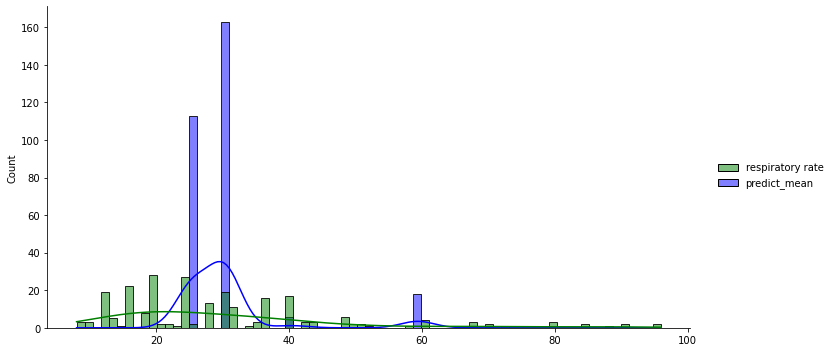

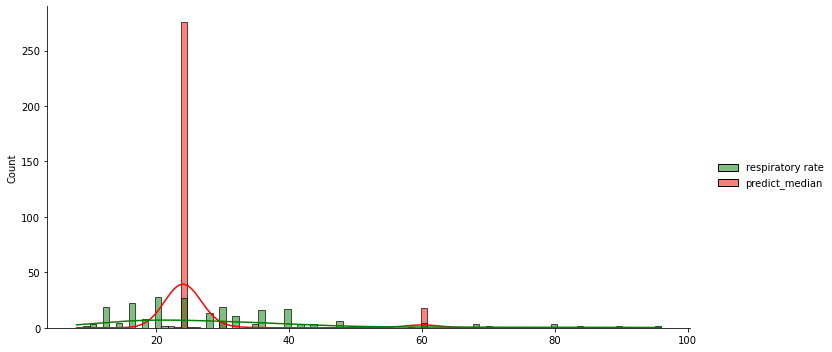

In [15]:
predict_wo_mean = df.groupby(['Age', 'surgery?', ])['respiratory rate'].transform('mean')
predict_wo_median = df.groupby(['Age', 'surgery?', ])['respiratory rate'].transform('median')

predict_wo_mean.name = 'predict_mean'
predict_wo_median.name = 'predict_median'

sns.displot([df['respiratory rate'], predict_wo_mean],kde=True, aspect=2, palette=['green', 'blue'])
sns.displot([df['respiratory rate'], predict_wo_median],kde=True, aspect=2, palette=['green', 'red'])

300
300


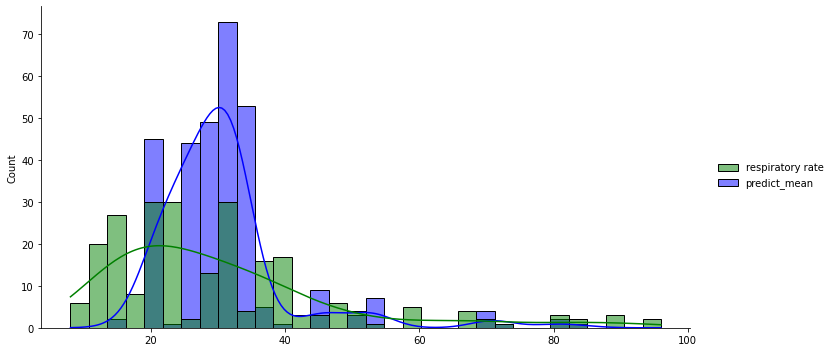

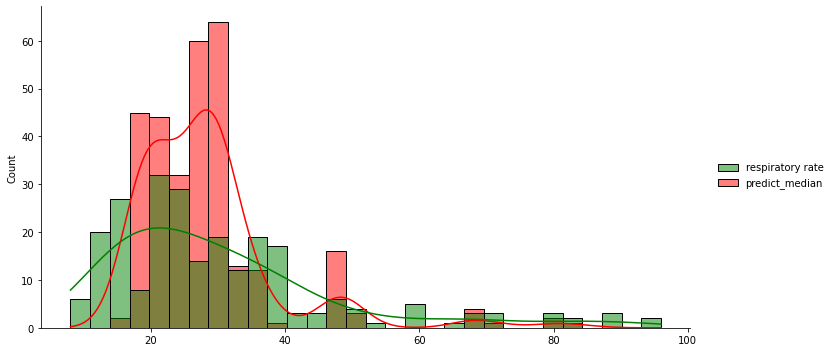

In [16]:
df['pulse_range'] = df['pulse'].apply(lin_to_range, step=15)
predict_median = df.groupby(['Age', 'surgery?', 'pulse_range'])['respiratory rate'].transform('median')
predict_mean = df.groupby(['Age', 'surgery?', 'pulse_range'])['respiratory rate'].transform('mean')



predict_mean.name = 'predict_mean'
predict_median.name = 'predict_median'


print(predict_median.count())
print(predict_mean.count())
sns.displot([df['respiratory rate'], predict_mean],kde=True, aspect=2, palette=['green', 'blue'])
sns.displot([df['respiratory rate'], predict_median],kde=True, aspect=2, palette=['green', 'red'])

In [17]:
# Заполняем пропуски медианным значениме т.к. оно больше напоминает исходное распределение 
# df['respiratory rate'].fillna(predict_mean, inplace=True)
df['respiratory rate'].fillna(predict_median, inplace=True)

> Но правильно ли заполнять непрерывную переменную медианными значениями в данной ситуации?

In [18]:
# df.drop(columns='pulse_range', inplace=True)

Уменьшеие шага до 5 позволит увеличить точнось предсказания

In [19]:
df['pulse_range'] = df['pulse'].apply(lin_to_range, step=6)

predict_pulse = (df.groupby(['Age', 'outcome', 'pulse_range'])['pain'].transform('median').round())

print(df['pain'].value_counts())
print(predict_pulse.value_counts())
print(predict_pulse.count())

3.0    67
2.0    59
5.0    42
4.0    39
1.0    38
Name: pain, dtype: int64
2.0    114
3.0     86
4.0     54
5.0     34
1.0      3
Name: pain, dtype: int64
291


Однако в то-же время не все пропуски будут заполнены.

Заполним пропуски в 2 шага

In [20]:
# 1. Используя диапазоны пульса заполняем максимальновозможное число пропусков 
df['pain'].fillna(predict_pulse, inplace=True)

# 2. Остальные пропуски заполняем уже без агрегации по пульсу 
df['pain'].fillna(df.groupby(['Age', 'outcome'])['pain'].transform('median').round(), inplace=True)

In [21]:
# Агрегируем по коррелирующим параметрам и берём среднее значение
(df['temperature of extremities']
.fillna(df.groupby(['outcome', 'pain',])['temperature of extremities'].transform('mean').round(), inplace = True)
)

In [22]:
# Аналогично
(df['rectal temperature']
.fillna(df.groupby(['Age', 'pulse_range'])['rectal temperature'].transform('mean').round(1), inplace=True)
)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    300 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          300 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory rate            300 non-null    float64
 5   temperature of extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     300 non-null    float64
 8   pulse_range                 300 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 21.2 KB


Все пропуски заполнены

# Сравнение основных статистических показателей для данных до заполнения пропусков и после

## До

In [24]:
df_stat_before

,rectal temperature,pulse,respiratory rate
count,240.000000,276.000000,242.000000
mean,38.167917,71.913043,30.417355
std,0.732289,28.630557,17.642231
min,35.400000,30.000000,8.000000
25%,37.800000,48.000000,18.500000
50%,38.200000,64.000000,24.500000
75%,38.500000,88.000000,36.000000
max,40.800000,184.000000,96.000000


In [25]:
df_mode_before

,surgery?,Age,temperature of extremities,pain,outcome
0,1.0,1,3.0,3.0,1.0


## После

In [26]:
df.describe()[['rectal temperature', 'pulse', 'respiratory rate']]

,rectal temperature,pulse,respiratory rate
count,300.000000,300.000000,300.000000
mean,38.173667,71.940000,30.275000
std,0.664136,28.211274,16.580861
min,35.400000,30.000000,8.000000
25%,37.900000,48.000000,20.000000
50%,38.200000,64.000000,28.000000
75%,38.500000,88.000000,36.000000
max,40.800000,184.000000,96.000000


In [27]:
df[['surgery?', 'Age', 'temperature of extremities', 'pain', 'outcome']].mode()

,surgery?,Age,temperature of extremities,pain,outcome
0,1.0,1,3.0,3.0,1.0
